<a href="https://colab.research.google.com/github/RajiRai/Python-Practice-Problems-for-Beginners/blob/master/Copy_of_Copy_of_Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install PyDrive


    100% |████████████████████████████████| 993kB 21.0MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 131304 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.3-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.3-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.3-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [19]:
!mkdir -p drive
!google-drive-ocamlfuse drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
from PIL import Image
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
download = drive.CreateFile({'id': '18s0FOQ-eR-RVuyrpS0sjzh9Lud8TXShg'})
download.GetContentFile('HAM10000_metadata.csv')

In [0]:
image_file = pd.read_csv('/content/drive/HAM10000_images/HAM10000_metadata.csv')

In [50]:
image_file.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [0]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}
image_file['le_type'] = image_file['dx'].map(lesion_type_dict.get) 
image_file['le_type_idx'] = pd.Categorical(image_file['le_type']).codes


In [13]:
image_file.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
le_type          0
le_type_idx      0
dtype: int64

In [0]:
image_file['age'].fillna((image_file['age'].median()), inplace=True)



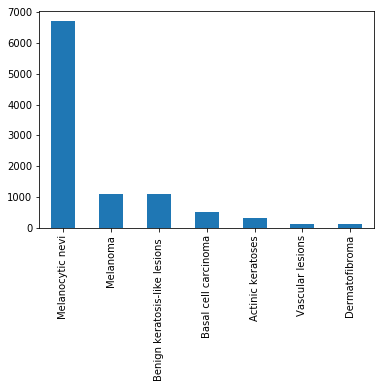

In [0]:
image_file['le_type'].value_counts().plot(kind='bar')

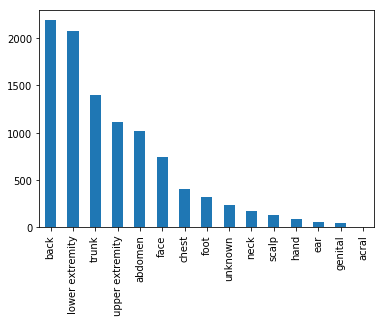

In [0]:
image_file['localization'].value_counts().plot(kind='bar')

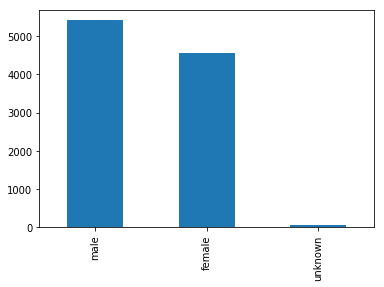

In [0]:
image_file['sex'].value_counts().plot(kind='bar')

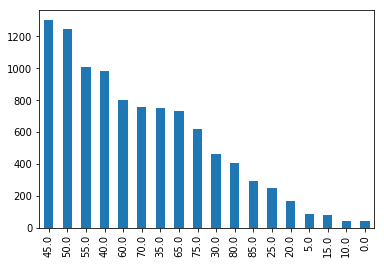

In [0]:
image_file['age'].value_counts().plot(kind='bar')

In [0]:
image_file.dtypes

lesion_id        object
image_id         object
dx               object
dx_type          object
age             float64
sex              object
localization     object
le_type          object
le_type_idx        int8
dtype: object

In [0]:
mod_image = []
for i in tqdm(range(image_file.shape[0])):
    img = image.load_img('/content/drive/HAM10000_images/'+image_file['image_id'][i]+'.jpg', target_size=(50,50,3))
    img = image.img_to_array(img)
    img = img/255
    mod_image.append(img)
    X = np.array(mod_image)

In [0]:
y=train['label'].values
y = to_categorical(y)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234, test_size=0.2)

In [0]:
y=image_file['le_type_idx'].values
y = to_categorical(y)

In [0]:
X_train, X_validate, y_train, y_validate = train_test_split(X,y, test_size = 0.1, random_state = 2)

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(50,50,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [35]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 9013 samples, validate on 2003 samples
Epoch 1/10
9013/9013 [==============================] - 112s 12ms/step - loss: 1.0294 - acc: 0.6671 - val_loss: 0.8865 - val_acc: 0.6595
Epoch 2/10
9013/9013 [==============================] - 109s 12ms/step - loss: 0.8972 - acc: 0.6787 - val_loss: 0.8087 - val_acc: 0.6645
Epoch 3/10
9013/9013 [==============================] - 113s 12ms/step - loss: 0.8398 - acc: 0.6911 - val_loss: 0.7740 - val_acc: 0.6980
Epoch 4/10
9013/9013 [==============================] - 110s 12ms/step - loss: 0.8080 - acc: 0.7015 - val_loss: 0.7386 - val_acc: 0.7039
Epoch 5/10
9013/9013 [==============================] - 111s 12ms/step - loss: 0.7671 - acc: 0.7182 - val_loss: 0.7166 - val_acc: 0.7244
Epoch 6/10
9013/9013 [==============================] - 113s 13ms/step - loss: 0.7377 - acc: 0.7217 - val_loss: 0.6511 - val_acc: 0.7489
Epoch 7/10
9013/9013 [==============================] - 111s 12ms/step - loss: 0.7

In [0]:
prediction = model.predict_classes(X_test)

In [47]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
loss_v, accuracy_v = model.evaluate(X_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))


1002/1002 [==============================] - 3s 3ms/step
Validation: accuracy = 0.725549  ;  loss_v = 0.735095
Test: accuracy = 0.810285  ;  loss = 0.517238
